In [1]:
#Libaries 
import networkx as nx
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('datos2.csv')
df.head()
#df.info()

,State FIPS,County FIPS,Postal Code,Name,Estimación de pobreza para todas las edades,90% IC LW,90% IC UP,Pobreza porcentual para todas las edades,90% IC LW.1,90% IC UP.1,Pobreza estimada edad 0-17,90% IC LW.2,90% IC UP.2,Pobreza porcentual edad 0-17,90% IC LW.3,90% IC UP.3,Ingreso familiar medio,90% IC UP.4,90% IC UP.5
0,1,1,AL,Autauga County,4926,3815,6038,10.4,8.1,12.7,1891,1423,2359,15.1,11.3,18.8,44241,41547,47109
1,1,3,AL,Baldwin County,15753,12234,19273,10.1,7.9,12.4,5550,4169,6932,15.6,11.7,19.5,41961,39479,44600
2,1,5,AL,Barbour County,5717,4411,7022,22.2,17.1,27.3,2083,1557,2609,30.5,22.8,38.2,26062,24432,27801
3,1,7,AL,Bibb County,3383,2619,4148,16.8,13.0,20.6,1237,925,1548,23.7,17.7,29.7,32924,30916,35062
4,1,9,AL,Blount County,6503,5041,7965,11.9,9.2,14.6,2272,1702,2841,17.3,13.0,21.7,37758,35473,40191


In [14]:
with open('datos2.csv','r') as nodecsv:  # csv data _ make sure to transform your dataframe into a csv file - 'dataset_2.csv','r'
    nodeReader = csv.reader(nodecsv) #No puse el delimiter, me la estaba troleando
    nodes = [n for n in nodeReader][1:] #node names + attibutes values (no attibutes names"1:"), las filas

node_names = [n[3] for n in nodes] #get list of node names, la columna

G = nx.Graph()

G.add_nodes_from(node_names) # seeting nodes names

In [15]:
Pobreza_estimada_todas_edades = {} #dictionaries to be filled with attibutes values
Pobreza_porcentual_todas_edades = {}
Pobreza_estimada_edades_0_17 = {}
Pobreza_porcentual_edades_0_17 = {}
Ingreso_familiar_medio = {}

for node in nodes: # Creation of attibute list of each vertex to be posteriorly assigned
    Pobreza_estimada_todas_edades[node[3]] = node[4]
    Pobreza_porcentual_todas_edades[node[3]] = node[7]
    Pobreza_estimada_edades_0_17[node[3]] = node[10]
    Pobreza_porcentual_edades_0_17[node[3]] = node[13]
    Ingreso_familiar_medio[node[3]] = node[16]

nx.set_node_attributes(G,Pobreza_estimada_todas_edades,'Pobreza_estimada_todas_edades')
nx.set_node_attributes(G,Pobreza_porcentual_todas_edades,'Pobreza_porcentual_todas_edades')
nx.set_node_attributes(G,Pobreza_estimada_edades_0_17,'Pobreza_estimada_edades_0_17')
nx.set_node_attributes(G,Pobreza_porcentual_edades_0_17,'Pobreza_porcentual_edades_0_17')
nx.set_node_attributes(G,Ingreso_familiar_medio,'Ingreso_familiar_medio')

In [16]:
for n_i in G.nodes():       # nested for loop for setting condition to add edges
      A_i_1 = int(G.nodes[n_i]['Pobreza_estimada_todas_edades']) #captures attibutes from 1st node
      A_i_2 = float(G.nodes[n_i]['Pobreza_porcentual_todas_edades'])
      A_i_3 = int(G.nodes[n_i]['Pobreza_estimada_edades_0_17'])
      A_i_4 = float(G.nodes[n_i]['Pobreza_porcentual_edades_0_17'])
      A_i_5 = int(G.nodes[n_i]['Ingreso_familiar_medio'])  
      for n_j in G.nodes():
          A_j_1 = int(G.nodes[n_j]['Pobreza_estimada_todas_edades']) #captures attibutes from 1st node
          A_j_2 = float(G.nodes[n_j]['Pobreza_porcentual_todas_edades'])
          A_j_3 = int(G.nodes[n_j]['Pobreza_estimada_edades_0_17'])
          A_j_4 = float(G.nodes[n_j]['Pobreza_porcentual_edades_0_17'])
          A_j_5 = int(G.nodes[n_j]['Ingreso_familiar_medio']) 
          if (A_i_2 and A_j_2 > 12):    #condition to add an edge
            G.add_edge(n_i,n_j)

In [17]:
G.remove_edges_from(nx.selfloop_edges(G)) #remover vertices conectados con si mismos, aumnetan todas las caracte, hay que saber interpretar
print(nx.info(G))
print('Densidad = ',nx.density(G))  #graph density, 1 es conexion completa
#print('Degree frec_list = ', nx.classes.function.degree_histogram(G)) #degree distribution
#print('Size of largest clique = ', nx.graph_clique_number(G) , ' nodes') #SOLO PARA BD PEQUENAS
print('Avg_clustering_coef = ', nx.average_clustering(G))

C:\Users\DELL\AppData\Local\Temp\ipykernel_1448\2214531080.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


Graph with 1874 nodes and 1420030 edges
Densidad =  0.8091334420892068
Avg_clustering_coef =  0.8924336439124404


Calculating best minimal value for power law fit
Power_law_exponent:  4.094601543248533
Power_law_min_value:  0.5632674853176721
LRT results:  -17.02528314702849 0.009409105311152544


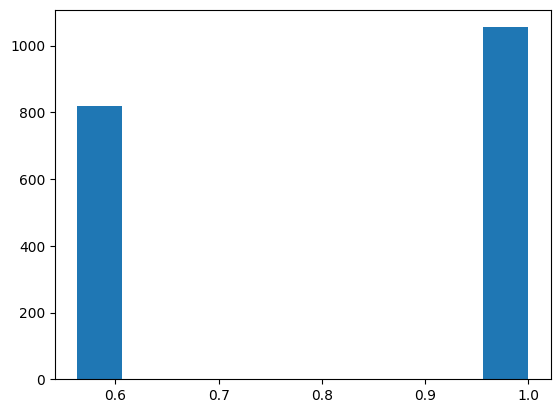

In [19]:
import powerlaw
from IPython.utils.py3compat import encode

#Small World Index. See https://networkx.org/documentation/stable/reference/algorithms/smallworld.html
#print('Small-World_sigma = ', nx.sigma(G))  # sigma > 1 implies small world structure, = 1 no es mundo pequeno

#Page Rank (https://en.wikipedia.org/wiki/PageRank#Damping_factor)
#print('Page_Rank_Scores = ', nx.pagerank(G)) #a dictionary of ranking nodes

data = list(nx.degree_centrality(G).values()) # List containing degree of each node as percentage of max degree
grados = pd.DataFrame(data)
grados.to_excel(r'C:\Users\DELL\Desktop\Data science\Unidad 2\Base_5_Poverty_USA\grados_pobreza.xlsx',index=False,header=True)
#print(data)



#print('Degree_centrality each node = ', data) #Escalada entre 0 y 1
data_2 =nx.classes.function.degree_histogram(G) # list containing frecuenie of degrees
data_3 = list(nx.pagerank(G).values()) #list containing PageRank scores
#Power Law Fit. Only for large graphs
plt.hist(data)
results = powerlaw.Fit(data)
#Parametros de la funcion
print('Power_law_exponent: ',results.power_law.alpha) #El exponente
print('Power_law_min_value: ',results.power_law.xmin) #Valor minimo
R, p = results.distribution_compare('power_law', 'lognormal') #If p<0.05 for a LRT, then a positive sign in R indicates the power-law model is favored.
#Si el p (segundo valor) < 0.05 y el R es positivo ley de potencia es mejor que el lognormal
print('LRT results: ', R,p)
#More power_law-codes for both goodness of fit and p-values in different programming languages are found in https://aaronclauset.github.io/powerlaws/

In [20]:
df = pd.read_csv('datos2.csv')
df.head()
#df.info()

,State FIPS,County FIPS,Postal Code,Name,Estimación de pobreza para todas las edades,90% IC LW,90% IC UP,Pobreza porcentual para todas las edades,90% IC LW.1,90% IC UP.1,Pobreza estimada edad 0-17,90% IC LW.2,90% IC UP.2,Pobreza porcentual edad 0-17,90% IC LW.3,90% IC UP.3,Ingreso familiar medio,90% IC UP.4,90% IC UP.5
0,1,1,AL,Autauga County,4926,3815,6038,10.4,8.1,12.7,1891,1423,2359,15.1,11.3,18.8,44241,41547,47109
1,1,3,AL,Baldwin County,15753,12234,19273,10.1,7.9,12.4,5550,4169,6932,15.6,11.7,19.5,41961,39479,44600
2,1,5,AL,Barbour County,5717,4411,7022,22.2,17.1,27.3,2083,1557,2609,30.5,22.8,38.2,26062,24432,27801
3,1,7,AL,Bibb County,3383,2619,4148,16.8,13.0,20.6,1237,925,1548,23.7,17.7,29.7,32924,30916,35062
4,1,9,AL,Blount County,6503,5041,7965,11.9,9.2,14.6,2272,1702,2841,17.3,13.0,21.7,37758,35473,40191


In [21]:
with open('datos2.csv','r') as nodecsv:  # csv data _ make sure to transform your dataframe into a csv file - 'dataset_2.csv','r'
    nodeReader = csv.reader(nodecsv) #No puse el delimiter, me la estaba troleando
    nodes = [n for n in nodeReader][1:] #node names + attibutes values (no attibutes names"1:"), las filas

node_names = [n[3] for n in nodes] #get list of node names, la columna

G = nx.Graph()

G.add_nodes_from(node_names) # seeting nodes names

In [22]:
Pobreza_estimada_todas_edades = {} #dictionaries to be filled with attibutes values
Pobreza_porcentual_todas_edades = {}
Pobreza_estimada_edades_0_17 = {}
Pobreza_porcentual_edades_0_17 = {}
Ingreso_familiar_medio = {}

for node in nodes: # Creation of attibute list of each vertex to be posteriorly assigned
    Pobreza_estimada_todas_edades[node[3]] = node[4]
    Pobreza_porcentual_todas_edades[node[3]] = node[7]
    Pobreza_estimada_edades_0_17[node[3]] = node[10]
    Pobreza_porcentual_edades_0_17[node[3]] = node[13]
    Ingreso_familiar_medio[node[3]] = node[16]

nx.set_node_attributes(G,Pobreza_estimada_todas_edades,'Pobreza_estimada_todas_edades')
nx.set_node_attributes(G,Pobreza_porcentual_todas_edades,'Pobreza_porcentual_todas_edades')
nx.set_node_attributes(G,Pobreza_estimada_edades_0_17,'Pobreza_estimada_edades_0_17')
nx.set_node_attributes(G,Pobreza_porcentual_edades_0_17,'Pobreza_porcentual_edades_0_17')
nx.set_node_attributes(G,Ingreso_familiar_medio,'Ingreso_familiar_medio')

In [24]:
for n_i in G.nodes():       # nested for loop for setting condition to add edges
      A_i_1 = int(G.nodes[n_i]['Pobreza_estimada_todas_edades']) #captures attibutes from 1st node
      A_i_2 = float(G.nodes[n_i]['Pobreza_porcentual_todas_edades'])
      A_i_3 = int(G.nodes[n_i]['Pobreza_estimada_edades_0_17'])
      A_i_4 = float(G.nodes[n_i]['Pobreza_porcentual_edades_0_17'])
      A_i_5 = int(G.nodes[n_i]['Ingreso_familiar_medio'])  
      for n_j in G.nodes():
          A_j_1 = int(G.nodes[n_j]['Pobreza_estimada_todas_edades']) #captures attibutes from 1st node
          A_j_2 = float(G.nodes[n_j]['Pobreza_porcentual_todas_edades'])
          A_j_3 = int(G.nodes[n_j]['Pobreza_estimada_edades_0_17'])
          A_j_4 = float(G.nodes[n_j]['Pobreza_porcentual_edades_0_17'])
          A_j_5 = int(G.nodes[n_j]['Ingreso_familiar_medio']) 
          if (A_i_4 and A_j_4 > 18):    #condition to add an edge
            G.add_edge(n_i,n_j)

In [25]:
G.remove_edges_from(nx.selfloop_edges(G)) #remover vertices conectados con si mismos, aumnetan todas las caracte, hay que saber interpretar
print(nx.info(G))
print('Densidad = ',nx.density(G))  #graph density, 1 es conexion completa
#print('Degree frec_list = ', nx.classes.function.degree_histogram(G)) #degree distribution
#print('Size of largest clique = ', nx.graph_clique_number(G) , ' nodes') #SOLO PARA BD PEQUENAS
print('Avg_clustering_coef = ', nx.average_clustering(G))

C:\Users\DELL\AppData\Local\Temp\ipykernel_1448\2214531080.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


Graph with 1874 nodes and 1734754 edges
Densidad =  0.9884632544368921
Avg_clustering_coef =  0.9898535923038588


Calculating best minimal value for power law fit
Power_law_exponent:  3194.024489106149
Power_law_min_value:  0.999466097170315
LRT results:  -29.735560866993822 0.0008616678873168415


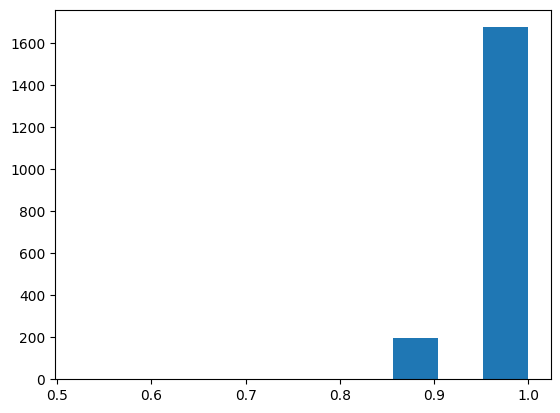

In [26]:
import powerlaw
from IPython.utils.py3compat import encode

#Small World Index. See https://networkx.org/documentation/stable/reference/algorithms/smallworld.html
#print('Small-World_sigma = ', nx.sigma(G))  # sigma > 1 implies small world structure, = 1 no es mundo pequeno

#Page Rank (https://en.wikipedia.org/wiki/PageRank#Damping_factor)
#print('Page_Rank_Scores = ', nx.pagerank(G)) #a dictionary of ranking nodes

data = list(nx.degree_centrality(G).values()) # List containing degree of each node as percentage of max degree
grados = pd.DataFrame(data)
grados.to_excel(r'C:\Users\DELL\Desktop\Data science\Unidad 2\Base_5_Poverty_USA\grados_pobreza_menores.xlsx',index=False,header=True)
#print(data)



#print('Degree_centrality each node = ', data) #Escalada entre 0 y 1
#data_2 =nx.classes.function.degree_histogram(G) # list containing frecuenie of degrees
#data_3 = list(nx.pagerank(G).values()) #list containing PageRank scores
#Power Law Fit. Only for large graphs
plt.hist(data)
results = powerlaw.Fit(data)
#Parametros de la funcion
print('Power_law_exponent: ',results.power_law.alpha) #El exponente
print('Power_law_min_value: ',results.power_law.xmin) #Valor minimo
R, p = results.distribution_compare('power_law', 'lognormal') #If p<0.05 for a LRT, then a positive sign in R indicates the power-law model is favored.
#Si el p (segundo valor) < 0.05 y el R es positivo ley de potencia es mejor que el lognormal
print('LRT results: ', R,p)
#More power_law-codes for both goodness of fit and p-values in different programming languages are found in https://aaronclauset.github.io/powerlaws/